In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [61]:
dataset = pd.read_csv('Customers.csv')

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [63]:
dataset.dropna(axis='columns', how='all')
dataset['Gender'] = dataset['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)
print(dataset)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       0   32                 126                      74
198         199       0   32                 137                      18
199         200       0   30                 137                      83

[200 rows x 5 columns]


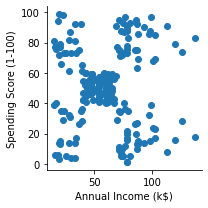

In [64]:
sns.FacetGrid(dataset).map(plt.scatter , "Annual Income (k$)", "Spending Score (1-100)")
plt.show()

In [65]:
x = dataset.iloc[:,[1,2,3,4]]
y = dataset.iloc[:,-1]

print(x.shape,y.shape)

(200, 4) (200,)


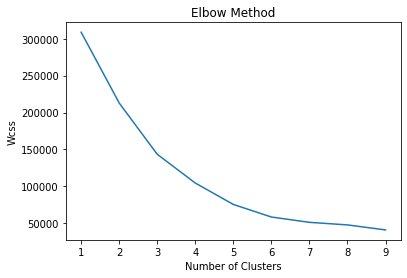

In [66]:
##ELBOW METHOD
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [67]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x)

#x_scaler = scaler.transform(x)
#pca = PCA(4)
#x_pca = pca.fit_transform(x_scaler)
#pca_dataset = pd.DataFrame(data=x_pca)

#SCORE GOT WORST DOING PCA





PCA had a negative effect on Sillouhette Score

In [68]:
##KMEANS
from sklearn.cluster import KMeans
nclusters = 5 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

KMeans(n_clusters=5)

In [69]:
##SILHOUETTE SCORE
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.44482259384548795


In [70]:
dataset['clusters'] = km.fit_predict(x)
dataset['clusters'] = dataset['clusters'].astype(int)
print(dataset)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       0   19                  15                      39   
1             2       0   21                  15                      81   
2             3       1   20                  16                       6   
3             4       1   23                  16                      77   
4             5       1   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       1   35                 120                      79   
196         197       1   45                 126                      28   
197         198       0   32                 126                      74   
198         199       0   32                 137                      18   
199         200       0   30                 137                      83   

     clusters  
0           0  
1           4  
2           0  
3           4  
4      

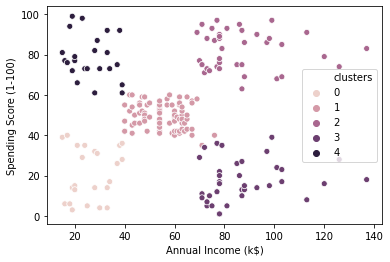

In [71]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = dataset['clusters'], data = dataset,legend = 'full' )